# **Computer Programming Project**

## **Loading Datasets**

Mounting Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Reading Files

In [3]:
ds1 = pd.read_csv('data/ideaspice.csv')
ds2 = pd.read_csv('data/employee_attrition.csv')

## **Preprocessing Datasets**

*   Our plan is to combine ds1 and ds2 since they have similar features.
*   After that we will carry out Exploratory Data Analysis to determine key features for model training.
*   Based on the key features, we will decide to join ds3 since it contains only a few features to work with.

### Preparing Dataset 1

Preview

In [4]:
ds1.head()

,EmployeId,Age,Gender,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,EducationField,EmployeSatisfaction,...,RelationshipSatisfaction,Hours,StockOptionLevel,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,63,29,M,Divorced,No,Sometimes,Research & Development,1,Medical,3,...,4,80,1,2,3,3,2,2,2,2
1,723,23,M,Single,No,Mostly,Sales,1,Life Sciences,2,...,4,80,0,3,3,1,0,0,0,6
2,1297,36,M,Single,Yes,Sometimes,Human Resources,4,Life Sciences,2,...,3,80,0,3,4,7,7,0,0,10
3,51,30,M,Divorced,No,Sometimes,Research & Development,4,Medical,3,...,2,80,3,5,3,10,6,3,9,12
4,1498,29,M,Single,Yes,Sometimes,Sales,3,Technical Degree,4,...,1,80,0,2,3,3,2,2,2,24


Basic information

In [5]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeId                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   Turnover                  1470 non-null   object
 5   Travelling                1470 non-null   object
 6   Vertical                  1470 non-null   object
 7   Qualifications            1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeSatisfaction       1470 non-null   int64 
 10  JobEngagement             1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobSatisfaction           1470 non-null   int64 
 13  Role                      1470 non-null   object
 14  DailyBilling            

Dropping duplicates

In [6]:
print(f"Before Dropping : {ds1.shape}")
ds1.drop_duplicates(inplace=True)
print(f"Before Dropping : {ds1.shape}")

Before Dropping : (1470, 32)
Before Dropping : (1470, 32)


**Inference**

*   This dataset contains no null values
*   We have drop duplicates.
*   Data Types are already fit for further process.

### Preparing Dataset 2

Dataset preview

In [7]:
ds2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Basic Information

In [8]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dropping duplicates

In [9]:
print(f"Before Dropping : {ds2.shape}")
ds2.drop_duplicates(inplace=True)
print(f"Before Dropping : {ds2.shape}")

Before Dropping : (1470, 35)
Before Dropping : (1470, 35)


Since columns ( 'EmployeeCount' , 'Over18' ) contain only one value across the dataset, we would like to drop these columns.



In [10]:
selected_cols = ['EmployeeCount','Over18']

ds2.drop(columns=selected_cols, inplace=True)

ds2.shape

(1470, 33)

**Inference**

*   This dataset contains no null values
*   we have drop duplicates.
*   Data Types are already fit for further process.

### Data Mapping

Since ds1 and ds2 have similar features but different column names, we need to standardize column names before merging them.

In [11]:
# for dataset1
ds1_col_mapping = {
    "Turnover": "Attrition",
    "Travelling": "BusinessTravel",
    "DailyBilling": "DailyRate",
    "Vertical": "Department",
    "EmployeId": "EmployeeID",
    "EmployeSatisfaction": "EnvironmentSatisfaction",
    "HourBilling": "HourlyRate",
    "JobEngagement": "JobInvolvement",
    "Role": "JobRole",
    "MonthlyRate": "MonthlyIncome",
    "MonthlyBilling": "MonthlyBill",
    "Work Experience": "NumCompaniesWorked",
    "Last Rating": "PerformanceRating",
    "Hours": "StandardHours",
    "Work&Life": "WorkLifeBalance"
}

ds1.rename(columns=ds1_col_mapping, inplace=True)
print("Updated Dataset1 Columns:\n", ds1.columns.sort_values(ascending=True))

Updated Dataset1 Columns:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EmployeeID',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyBill', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'Qualifications',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager'],
      dtype='object')


In [12]:
# for dataset2
ds2_col_mapping = {
    "Education": "Qualifications",
    "MonthlyRate": "MonthlyBill",
    "EmployeeNumber": "EmployeeID",
    "YearsWithCurrManager": "YearsWithCurrentManager"
}

ds2.rename(columns=ds2_col_mapping, inplace=True)
print("Updated Dataset2 Columns:\n", ds2.columns.sort_values(ascending=True))

Updated Dataset2 Columns:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EmployeeID',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyBill', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'Qualifications',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrentManager'],
      dtype='object')


Dealing with missing column from dataset 1

In [13]:
missing_in_ds1 = set(ds2.columns) - set(ds1.columns)
print("Columns missing in dataset1:", missing_in_ds1)

Columns missing in dataset1: {'TotalWorkingYears'}


In [14]:
ds2.drop(columns=['TotalWorkingYears'], inplace=True)
ds2.shape

(1470, 32)

Dealing with Gender values in dataset 2

In [15]:
ds2['Gender'] = ds2['Gender'].replace({'Male': 'M', 'Female': 'F'})

### Merging Datasets Forming Final Dataset

At this point, we obtained matching datasets. Thus why we would use Outer Join method to merge these two datasets.

In [16]:
print("Shape Before merging:",ds2.shape)
main_ds = ds2.merge(ds1, how="outer")
print("Shape Before merging:",main_ds.shape)

Shape Before merging: (1470, 32)
Shape Before merging: (2940, 32)


In [17]:
main_ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Qualifications,EducationField,EmployeeID,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,18,No,Mostly,480,Research & Development,8,2,Life Sciences,645,3,...,3,3,80,1,0,3,4,1,1,2
1,18,No,No,1187,Sales,15,3,Medical,896,3,...,4,3,80,1,0,2,9,3,2,7
2,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,...,3,4,80,0,2,3,0,0,0,0
3,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1368,4,...,3,3,80,0,5,4,0,0,0,0
4,18,No,Non-Travel,1431,Research & Development,14,3,Medical,1839,2,...,3,3,80,0,4,1,0,0,0,0


Since StandardHours column only contain '80' value across the whole dataset, let's drop it.

In [18]:
main_ds.drop(columns=['StandardHours'], inplace=True)
main_ds.shape

(2940, 31)

In [19]:
main_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Qualifications            2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeID                2940 non-null   int64 
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

### Features Encoding

Find out the catagorical columns

In [20]:
numeric_ds = main_ds.select_dtypes(include=['number'])

cat_cols = list(set(main_ds.columns)-set(numeric_ds.columns))
cat_cols

['Attrition',
 'JobRole',
 'EducationField',
 'BusinessTravel',
 'Gender',
 'MaritalStatus',
 'Department',
 'OverTime']

We will carry out Label Encoding

In [21]:
encoders = {} # Dictionary to store LabelEncoders

for col in cat_cols:
    encoders[col] = LabelEncoder()
    main_ds[col] = encoders[col].fit_transform(main_ds[col])

In [22]:
# For decoding back to original categorical values

#for col in cat_cols:
#    main_ds[col] = encoders[col].inverse_transform(main_ds[col])


##  **Exploratory Data Analysis (EDA)**

#### Attrition Correlation

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/3584156446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= corr_matrix[1:], palette="coolwarm")


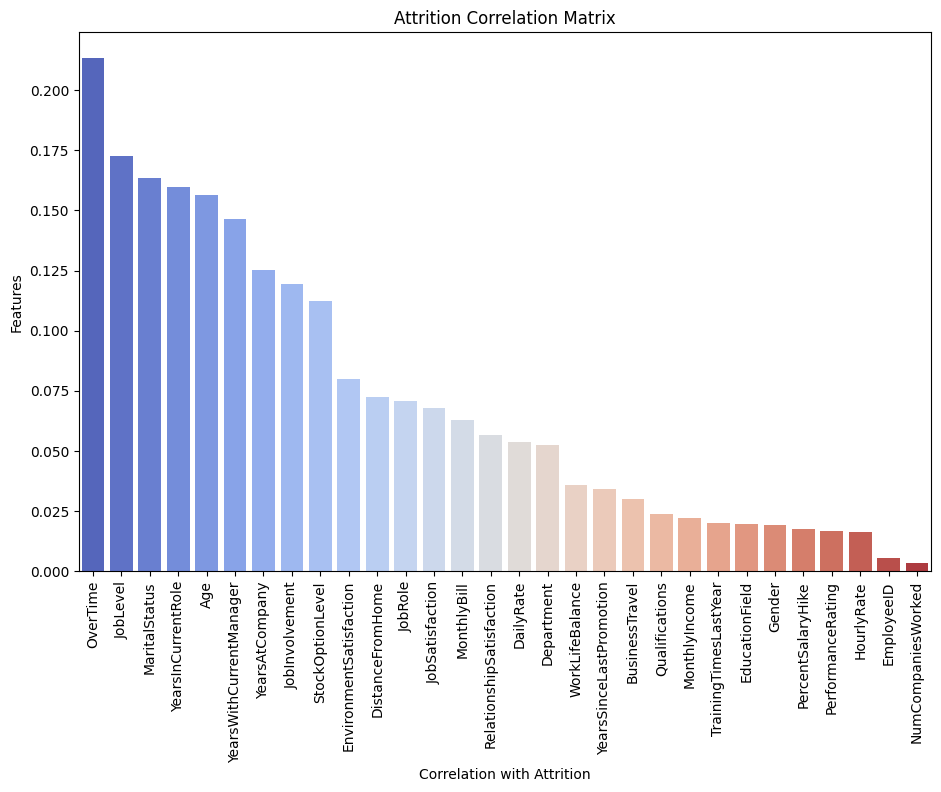

In [23]:
corr_matrix = main_ds.corr()['Attrition'].abs().sort_values(ascending=False)

plt.figure(figsize=(11, 7))
sns.barplot(data= corr_matrix[1:], palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Correlation with Attrition")
plt.ylabel("Features")
plt.title("Attrition Correlation Matrix")
plt.show()



- We can conclude that 'OverTime' is the top positively related feature, while JobLevel, MaritalStatus, YearsInCurrentRole, Age and YearsWithCurrentManager have similar level of positive relation.
- Since MonthlyIncome, HourlyRate, DailyRate are in lower level. It can mean that the company is paying well enough to keep the employees. (We need to keep in mind that our dataset represent only one company)
- YearsSinceLastPromotion and PercentSalaryHike also don't have considerable impact on the Attrition.
- Self features like Gender, EducationField, Qualifications and WorkLifeBalance are not strong Predictors.



#### Age Distribution


/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/119665808.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_ds.groupby(["Age_Group", "Attrition"]).size().unstack().plot(kind="bar", stacked=True, color=['lightsteelblue','lightpink'], ax=axes[1])


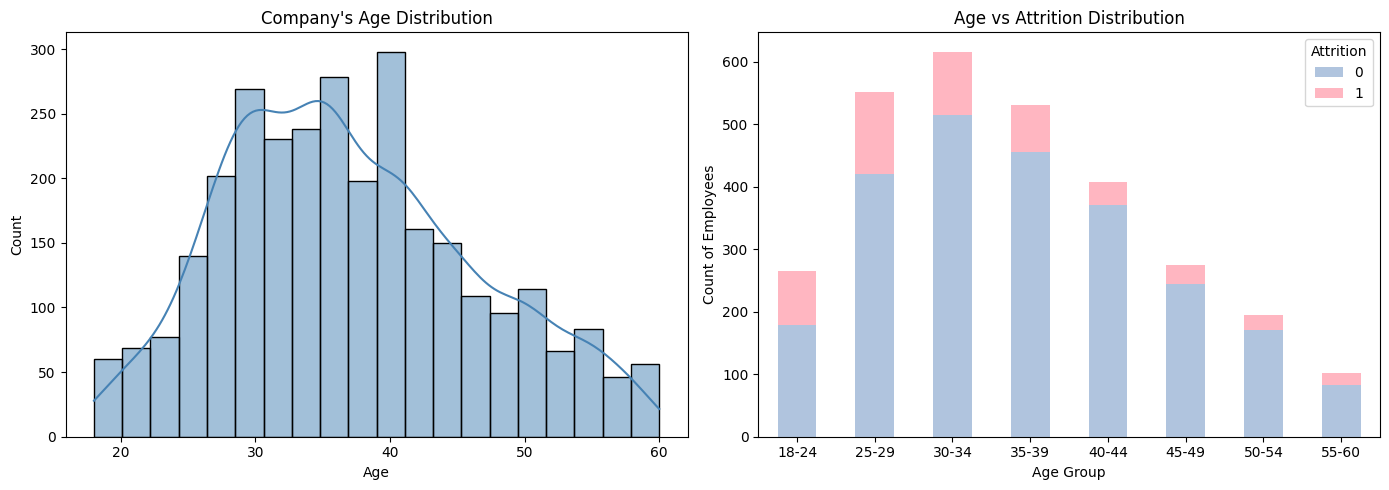

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for Age Distribution
sns.histplot(main_ds['Age'], bins=20, kde=True, color='steelblue', ax=axes[0])
axes[0].set_title("Company's Age Distribution")
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Bar Plot for Age vs Attrition Distribution
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-60"]
main_ds["Age_Group"] = pd.cut(main_ds["Age"], bins=bins, labels=labels, include_lowest=True) # prepare custom column for age groups

main_ds.groupby(["Age_Group", "Attrition"]).size().unstack().plot(kind="bar", stacked=True, color=['lightsteelblue','lightpink'], ax=axes[1])
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Count of Employees")
axes[1].set_title("Age vs Attrition Distribution")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- We can obeserve that attrition occurs more frequently for the younger age groups.

#### Job related Features

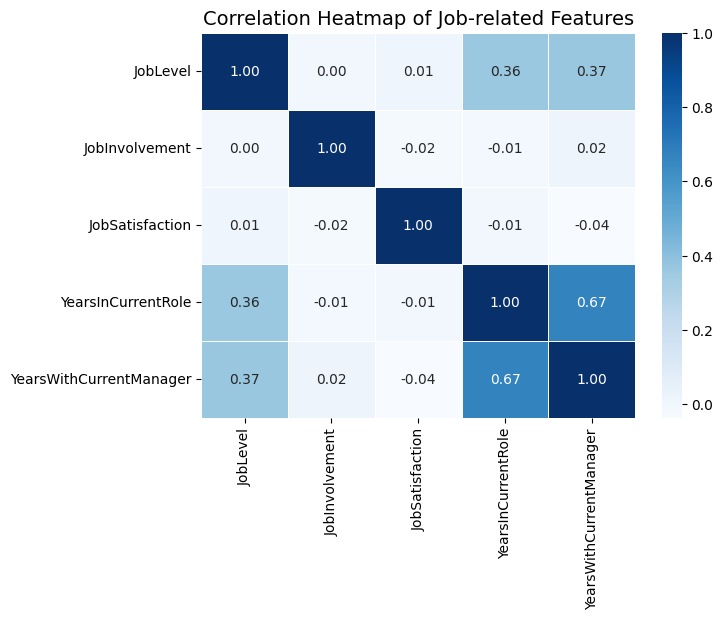

In [25]:
job_related_features = ["JobLevel", "JobInvolvement", "JobSatisfaction", "YearsInCurrentRole", "YearsWithCurrentManager"]

corr_matrix = main_ds[job_related_features].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Heatmap of Job-related Features", fontsize=14)
plt.show()

- Our main focus across the heatmap is the 'JobSatisfaction' and the result shows that it is not related with other job related features.

Text(0.5, 1.0, 'JobLevel vs Attrition Distribution')

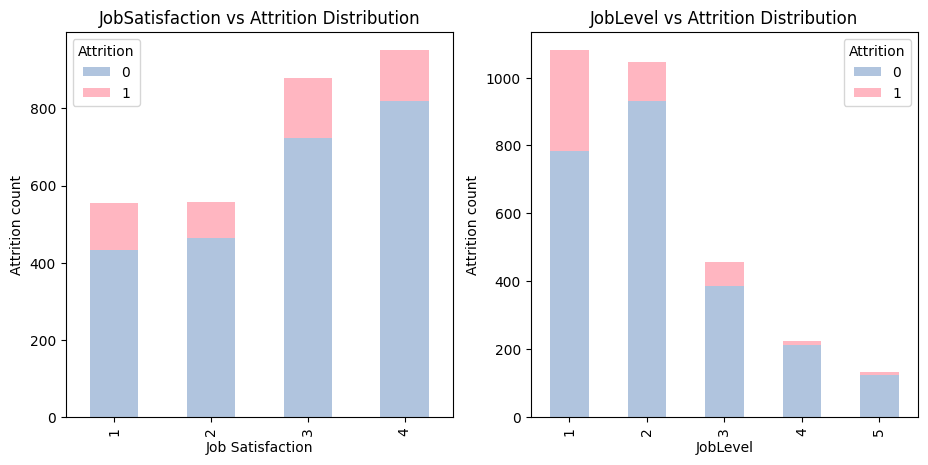

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

main_ds.groupby(["JobSatisfaction", "Attrition"]).size().unstack().plot(kind="bar", stacked=True, color=['lightsteelblue','lightpink'], ax=axes[0])
axes[0].set_xlabel("Job Satisfaction")
axes[0].set_ylabel("Attrition count")
axes[0].set_title("JobSatisfaction vs Attrition Distribution")

main_ds.groupby(["JobLevel", "Attrition"]).size().unstack().plot(kind="bar", stacked=True, color=['lightsteelblue','lightpink'], ax=axes[1])
axes[1].set_xlabel("JobLevel")
axes[1].set_ylabel("Attrition count")
axes[1].set_title("JobLevel vs Attrition Distribution")

- From this distribution, we can learn that low JobLevels are more likely to quit (Attrition).
- Job satisfaction does't show clear differentiation for attrition calculation.
- JobLevel is the more important feature.

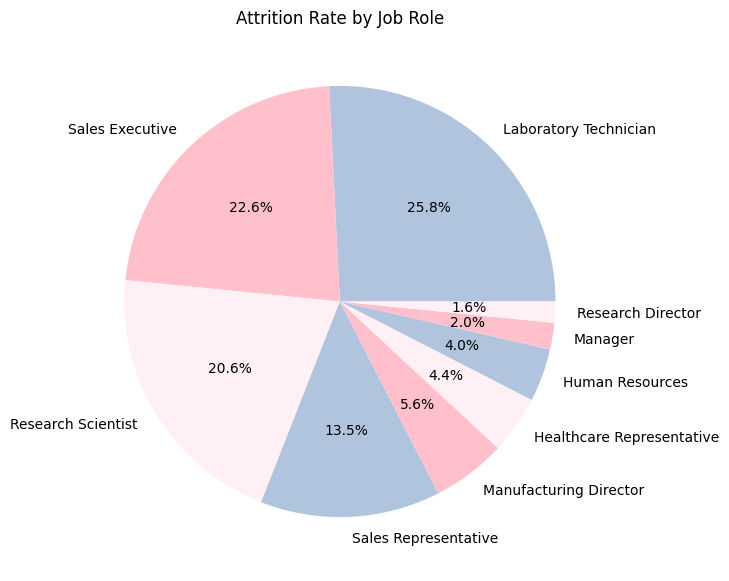

In [27]:
# Retrieve JobRole classes from the encoder
jobrole_mapping = dict(zip(encoders['JobRole'].transform(encoders['JobRole'].classes_), encoders['JobRole'].classes_))

attrition_counts = main_ds.groupby('JobRole')['Attrition'].sum().sort_values(ascending=False)
attrition_counts.index = attrition_counts.index.map(jobrole_mapping) # map retrieved clasess

plt.figure(figsize=(7,7))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['lightsteelblue', 'pink', 'lavenderblush'])
plt.title('Attrition Rate by Job Role')
plt.show()

- From this chart, we can see clearly that 'Rearch Scientist', 'Sales Executive' & 'Laboratory Technician' are tend to have more attrition rate.
- JobRole is an important feature.

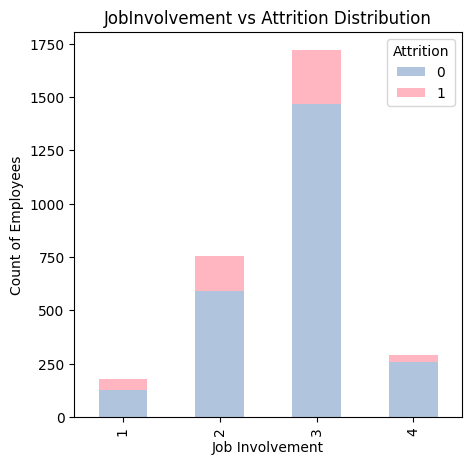

In [28]:
main_ds.groupby(["JobInvolvement", "Attrition"]).size().unstack().plot(kind="bar", stacked=True, figsize=[5,5], color=['lightsteelblue','lightpink'])
plt.xlabel("Job Involvement")
plt.ylabel("Count of Employees")
plt.title("JobInvolvement vs Attrition Distribution")
plt.show()

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/3936180683.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_ds.groupby('YearsInCurrentRole_Binned')['Attrition'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightsteelblue', 'pink', 'lavenderblush'], ax=axes[0])
/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/3936180683.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_ds.groupby('YearsWithCurrentManager_Binned')['Attrition'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightsteelblue', 'pink',  'lavenderblush'], ax=axes[1])


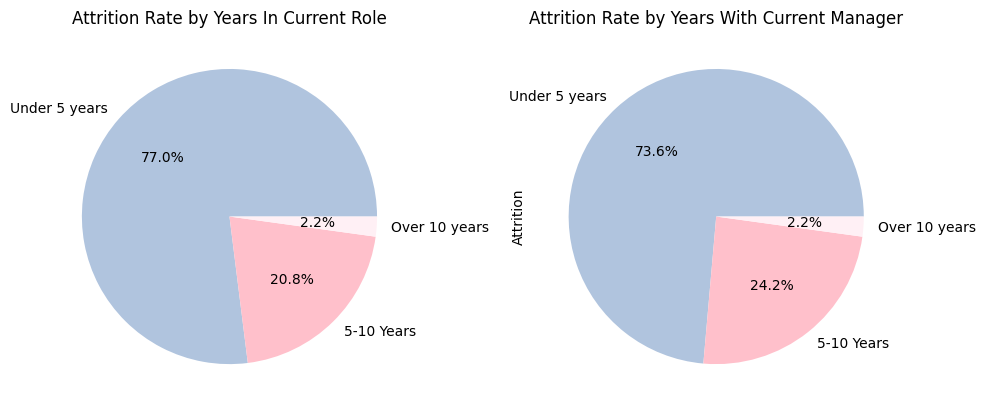

In [29]:
# Let's use 5 years binning
bins = [0, 5, 10, np.inf]
labels = ['Under 5 years', '5-10 Years', 'Over 10 years']

main_ds['YearsInCurrentRole_Binned'] = pd.cut(main_ds['YearsInCurrentRole'], bins=bins, labels=labels, right=False)
main_ds['YearsWithCurrentManager_Binned'] = pd.cut(main_ds['YearsWithCurrentManager'], bins=bins, labels=labels, right=False)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

main_ds.groupby('YearsInCurrentRole_Binned')['Attrition'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightsteelblue', 'pink', 'lavenderblush'], ax=axes[0])
axes[0].set_title('Attrition Rate by Years In Current Role')
axes[0].set_ylabel('')

main_ds.groupby('YearsWithCurrentManager_Binned')['Attrition'].sum().plot(kind='pie', autopct='%1.1f%%', colors=['lightsteelblue', 'pink',  'lavenderblush'], ax=axes[1])
axes[1].set_title('Attrition Rate by Years With Current Manager')
axes[0].set_ylabel('')

plt.tight_layout()
plt.show()

- From this observation, we can conclude YearsInCurrentRole and YearsWithCurrentManager are important features in considering the Attrition, since majority of attrition (about75%) come from under 5 years of joining with the company.

#### Income related Features

In [30]:
main_ds['NetIncome']= main_ds['MonthlyIncome']-main_ds['MonthlyBill']

main_ds['NetIncome'].describe()

count     2940.000000
mean       -11.235714
std      11562.969472
min     -25990.000000
25%      -8781.750000
50%       -160.500000
75%       8655.000000
max      25236.000000
Name: NetIncome, dtype: float64

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/323133949.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_ds.groupby(['NetIncomeGroup', 'Attrition']).size().unstack().plot(kind='bar', figsize=[5,5], stacked=True, color=['lightsteelblue', 'pink'])


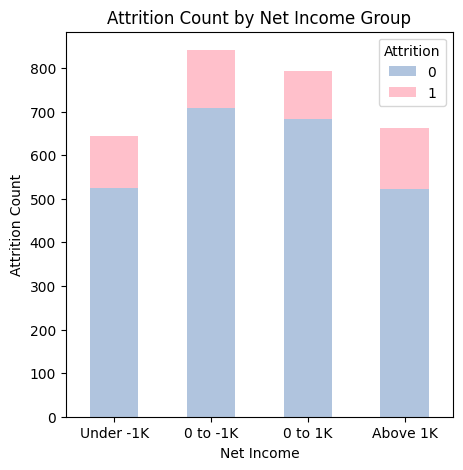

In [31]:
# For binning, we will focus on negative vs positive NetIncome
bins=[-np.inf, -10000, 0, 10000, np.inf]
labels=['Under -1K', '0 to -1K', '0 to 1K', 'Above 1K']

main_ds['NetIncomeGroup'] = pd.cut(main_ds['NetIncome'], bins=bins, labels=labels)

main_ds.groupby(['NetIncomeGroup', 'Attrition']).size().unstack().plot(kind='bar', figsize=[5,5], stacked=True, color=['lightsteelblue', 'pink'])
plt.title("Attrition Count by Net Income Group")
plt.xlabel("Net Income")
plt.ylabel("Attrition Count")
plt.xticks(rotation=0)
plt.show()

In [32]:
print(f"Correlation between NetIncome and Attrition: {main_ds[['NetIncome', 'Attrition']].corr().iloc[0, 1]:.2f}")

Correlation between NetIncome and Attrition: 0.03


- This confirm our finding about the income related features doesn't have much effect on the Attrition for this company.
- But we have found that average Net Income is near zero.

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/280347509.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_ds, x='MaritalStatus', y='NetIncome', ax=axes[1], palette="Blues")


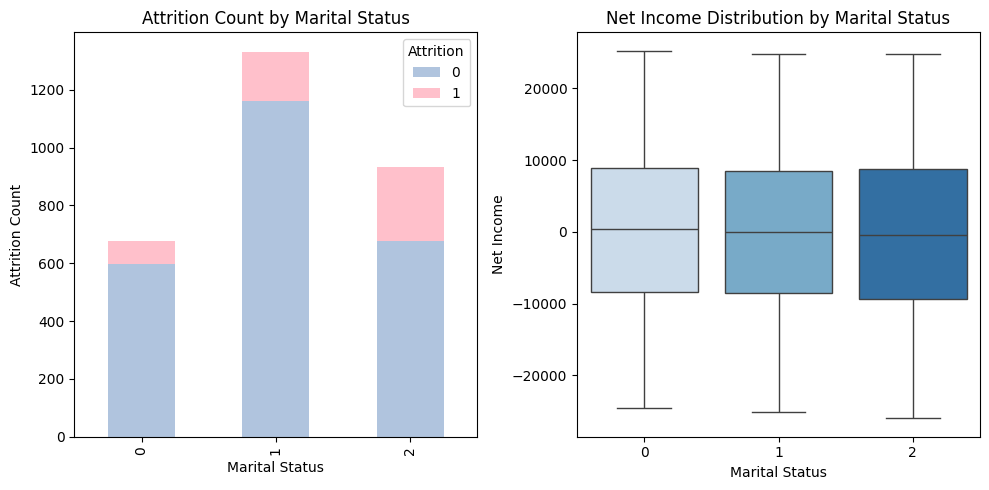

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

main_ds.groupby(['MaritalStatus', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'pink'], ax=axes[0])
axes[0].set_title("Attrition Count by Marital Status")
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Attrition Count")
axes[0].legend(title="Attrition")

sns.boxplot(data=main_ds, x='MaritalStatus', y='NetIncome', ax=axes[1], palette="Blues")
axes[1].set_title("Net Income Distribution by Marital Status")
axes[1].set_xlabel("Marital Status")
axes[1].set_ylabel("Net Income")

plt.tight_layout()
plt.show()

- Additionally, checking if the NetIncome depends on the MaritalStatus but found out that it doesn't.
- But divorced employees tend to leave more while single employees tend to stay.

#### Additional Features

> Attrition by StockOptionLevel

StockOptionLevl typically represents the level of stock options granted to an employee as part of their compensation package.

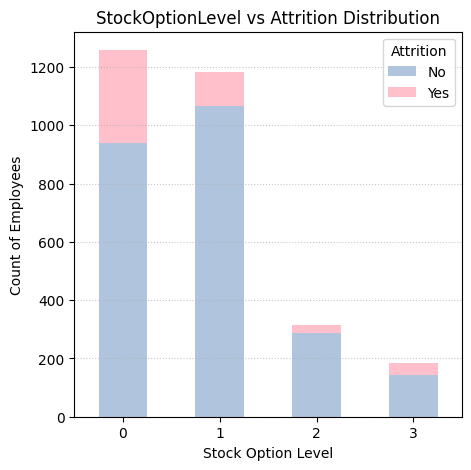

In [34]:
main_ds.groupby(["StockOptionLevel", "Attrition"]).size().unstack().plot(kind="bar", stacked=True, figsize=[5,5], color=['lightsteelblue', 'pink'])

plt.xlabel("Stock Option Level")
plt.ylabel("Count of Employees")
plt.title("StockOptionLevel vs Attrition Distribution")
plt.xticks(rotation=0)
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.grid(axis="y", linestyle=":", alpha=0.7)
plt.show()

In [35]:
main_ds['DistanceFromHome'].describe()

count    2940.000000
mean        9.235374
std         8.130760
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/1345700456.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  main_ds.groupby(['DistanceGroup', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=[5,5], color=['lightsteelblue', 'pink'])


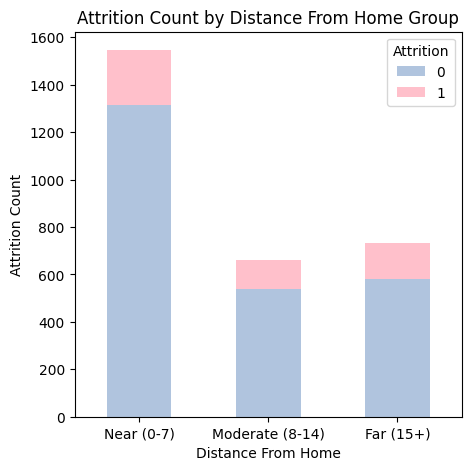

In [36]:
bins = [0, 7, 14, np.inf]
labels = ['Near (0-7)', 'Moderate (8-14)', 'Far (15+)']

main_ds['DistanceGroup'] = pd.cut(main_ds['DistanceFromHome'], bins=bins, labels=labels)

main_ds.groupby(['DistanceGroup', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=[5,5], color=['lightsteelblue', 'pink'])

plt.title("Attrition Count by Distance From Home Group")
plt.xlabel("Distance From Home")
plt.ylabel("Attrition Count")
plt.xticks(rotation=0)
plt.show()

## **Feature Selection**

Based on the EDA process, our selected features are :
1. OverTime
2. Age
3. JobRole
4. JobLevel
5. YearsInCurrentRole
6. JobInvolvement
7. MaritalStatus
8. Job Statisfaction

Optional :
1. YearsWithCurrentManager
2. StockOptionLevel
3. DistanceFromHome


In [37]:
X = main_ds[['OverTime', 'Age', 'JobRole', 'JobLevel', 'YearsInCurrentRole', 'JobInvolvement', 'MaritalStatus', 'JobSatisfaction']] # Selected Features
y = main_ds['Attrition'] # Target Feature

Split data for Training and Testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # not fit_transform to prevent data leakage
# we will leave the target (y) part because we are solving a classification prediction problem

In [40]:
# Ensure X_train is a DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [41]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2058, 8)
X_test shape: (882, 8)
y_train shape: (2058,)
y_test shape: (882,)


## **Model Training**

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### Linear Regression Model

🔹 Logistic Regression Performance 🔹
Accuracy: 0.8401, Precision: 0.7027, Recall: 0.1667, F1 Score: 0.2694, AUC-ROC: 0.7560


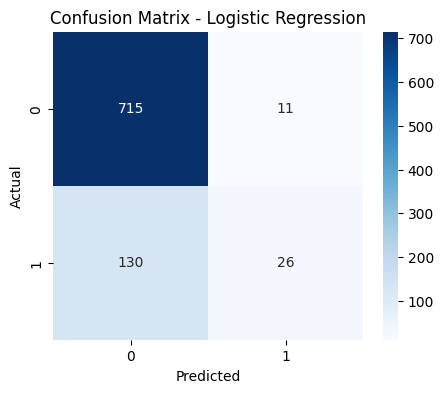

In [43]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

print("🔹 Logistic Regression Performance 🔹")
print(f"Accuracy: {acc_log:.4f}, Precision: {prec_log:.4f}, Recall: {rec_log:.4f}, F1 Score: {f1_log:.4f}, AUC-ROC: {auc_log:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


The Logistic Regression model demonstrated an accuracy of 84%, indicating that it correctly predicted employee attrition and retention in most cases. However, further analysis of the confusion matrix reveals a significant issue with recall. The model successfully identified 715 employees who stayed (True Negatives) and 26 employees who left (True Positives). However, it also misclassified 130 employees who actually left as staying (False Negatives), resulting in a low recall of 16.7%. This suggests that the model is failing to identify a large portion of employees at risk of attrition. While the precision score of 70.2% indicates that when the model does predict attrition, it is often correct, the imbalance between precision and recall leads to a low F1-score of 26.9%, showing that the model struggles to balance accuracy in predicting attrition cases. Additionally, the AUC-ROC score of 75.6% suggests moderate discrimination ability between employees who leave and those who stay.

### Decision Trees

🔹 Decision Tree Performance 🔹
Accuracy: 0.7540, Precision: 0.3216, Recall: 0.3526, F1 Score: 0.3364, AUC-ROC: 0.5955


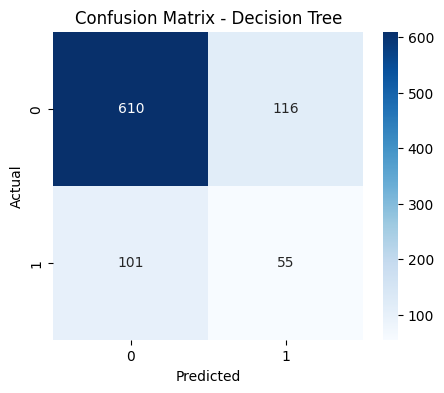

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print("🔹 Decision Tree Performance 🔹")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {rec_dt:.4f}, F1 Score: {f1_dt:.4f}, AUC-ROC: {auc_dt:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


The Decision Tree model achieved an accuracy of 76.5%, indicating that it correctly classified the majority of employee attrition cases. However, when analyzing the confusion matrix, it becomes evident that the model struggles with precision and recall. The model correctly identified 620 employees who stayed (True Negatives) and 55 employees who left (True Positives). However, it also misclassified 101 employees who actually left as staying (False Negatives) and incorrectly predicted 106 employees as leaving when they actually stayed (False Positives). As a result, the model’s precision is 34.2%, meaning that when it predicts attrition, it is correct only about one-third of the time. The recall of 35.3% suggests that the model is slightly better at capturing actual attrition cases than Logistic Regression but still fails to identify a majority of employees who leave. This is reflected in the low F1-score of 34.7%, showing that the balance between precision and recall remains weak. Furthermore, the AUC-ROC score of 60.4% suggests that the model has poor discriminatory power between employees who stay and those who leave.

### Random Forest

🔹 Random Forest Performance 🔹
Accuracy: 0.8231, Precision: 0.5000, Recall: 0.2179, F1 Score: 0.3036, AUC-ROC: 0.7594


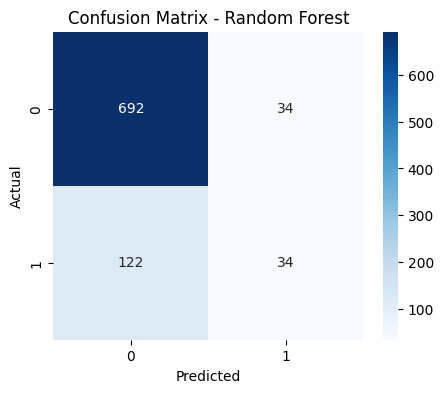

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("🔹 Random Forest Performance 🔹")
print(f"Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1 Score: {f1_rf:.4f}, AUC-ROC: {auc_rf:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


The Random Forest model achieved an accuracy of 82.20%, suggesting that it correctly classified the majority of employee attrition and retention cases. However, despite the relatively high accuracy, the model exhibits imbalanced performance in precision and recall. The confusion matrix shows that the model correctly identified 691 employees who stayed (True Negatives) and 35 employees who left (True Positives). However, it also misclassified 122 employees who actually left as staying (False Negatives) and incorrectly predicted 36 employees as leaving when they actually stayed (False Positives). As a result, the model’s precision is 49.28%, meaning that when it predicts attrition, it is correct less than half of the time. Meanwhile, the recall of 21.79% indicates that the model fails to capture a significant portion of actual attrition cases, leading to a low F1-score of 30.22%. Despite these shortcomings, the AUC-ROC score of 75.93% suggests that the model has a reasonable ability to differentiate between employees who stay and those who leave.

### Gradient Descent XGBoost

🔹 XGBoost Performance 🔹
Accuracy: 0.8220, Precision: 0.4946, Recall: 0.2949, F1 Score: 0.3695, AUC-ROC: 0.7330


/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:10:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


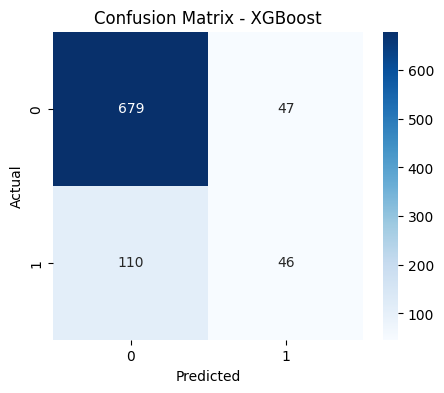

In [46]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print("🔹 XGBoost Performance 🔹")
print(f"Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}, Recall: {rec_xgb:.4f}, F1 Score: {f1_xgb:.4f}, AUC-ROC: {auc_xgb:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


The XGBoost model achieved an accuracy of 82.2%, indicating that it correctly classified most employee attrition and retention cases. However, its performance across precision and recall remains imbalanced. According to the confusion matrix, the model successfully identified 679 employees who stayed (True Negatives) and 46 employees who left (True Positives). However, it also misclassified 110 employees who actually left as staying (False Negatives) and incorrectly predicted 47 employees as leaving when they actually stayed (False Positives). The precision of 49.5% suggests that when the model predicts an employee will leave, it is correct about half the time. The recall of 29.5% is an improvement over Random Forest (21.2%) but still relatively low, indicating that the model fails to capture a significant number of actual attrition cases. The F1-score of 36.9% reflects the difficulty in balancing precision and recall, while the AUC-ROC score of 73.3% suggests a moderate ability to differentiate between employees who stay and those who leave.

### Gradient Descent LightGBM

[LightGBM] [Info] Number of positive: 348, number of negative: 1710
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 2058, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169096 -> initscore=-1.592046
[LightGBM] [Info] Start training from score -1.592046
🔹 LightGBM Performance 🔹
Accuracy: 0.8254, Precision: 0.5122, Recall: 0.2692, F1 Score: 0.3529, AUC-ROC: 0.7411


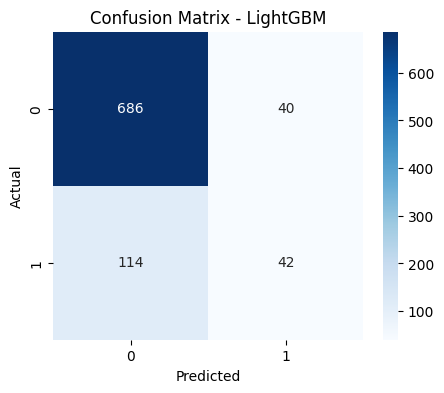

In [47]:
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm)
rec_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])

print("🔹 LightGBM Performance 🔹")
print(f"Accuracy: {acc_lgbm:.4f}, Precision: {prec_lgbm:.4f}, Recall: {rec_lgbm:.4f}, F1 Score: {f1_lgbm:.4f}, AUC-ROC: {auc_lgbm:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()


The LightGBM model achieved an accuracy of 83.45%, demonstrating strong overall classification performance. However, similar to previous models, it exhibits a trade-off between precision and recall. According to the confusion matrix, the model correctly classified 692 employees who stayed (True Negatives) and 44 employees who left (True Positives). However, it misclassified 107 employees who actually left as staying (False Negatives) and incorrectly predicted 39 employees as leaving when they actually stayed (False Positives). The model’s precision of 53.01% suggests that when it predicts attrition, it is correct about half the time. However, the recall of 29.14% remains low, indicating that the model still fails to capture a significant portion of actual attrition cases. The F1-score of 37.61% reflects this imbalance, while the AUC-ROC score of 76.03% suggests a moderate ability to differentiate between employees who stay and those who leave.

## **Cross validation**

In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [49]:
# Define Stratified K-Fold (ensures class balance across folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

# Function to perform cross-validation
def cross_validate_model(model, X, y, cv):
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    auc = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')

    return {
        "Accuracy": np.mean(accuracy),
        "Precision": np.mean(precision),
        "Recall": np.mean(recall),
        "F1 Score": np.mean(f1),
        "AUC-ROC": np.mean(auc)
    }

# Perform cross-validation for all models
results = {}
for name, model in models.items():
    print(f"Running Cross-Validation for {name}...")
    results[name] = cross_validate_model(model, X, y, cv)

# Convert results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nCross-Validation Results (Averaged across 5 folds):")
print(results_df)

Running Cross-Validation for Logistic Regression...
Running Cross-Validation for Decision Tree...
Running Cross-Validation for Random Forest...
Running Cross-Validation for XGBoost...


/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:10:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:10:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [09:10:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

Running Cross-Validation for LightGBM...
[LightGBM] [Info] Number of positive: 404, number of negative: 1948
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 2352, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171769 -> initscore=-1.573144
[LightGBM] [Info] Start training from score -1.573144
[LightGBM] [Info] Number of positive: 403, number of negative: 1949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 2352, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.17134

From cross-validation, out of the five models tested, LightGBM outperformed all others, achieving the highest accuracy (83.37%), precision (53.28%), and AUC-ROC score (73.58%). It demonstrated a strong balance between precision and recall, making it the most effective model for distinguishing between employees who stay and those who leave.

Use Decision Tree if the priority is to catch more attrition cases, as it achieved the highest recall (37.29%). This model is best suited for scenarios where identifying employees at risk of leaving is more important than overall accuracy.

Use XGBoost if a balance between accuracy (82.59%) and recall (28.96%) is needed. It provides a good trade-off between correctly identifying attrition cases and maintaining strong classification performance

## **Grid Search**

In [50]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[LightGBM] [Info] Number of positive: 278, number of negative: 1368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1646, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168894 -> initscore=-1.593484
[LightGBM] [Info] Start training from score -1.593484
[LightGBM] [Info] Number of positive: 279, number of negative: 1368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1647, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169399 -> initscore=-1.589893
[LightGBM] [Info]

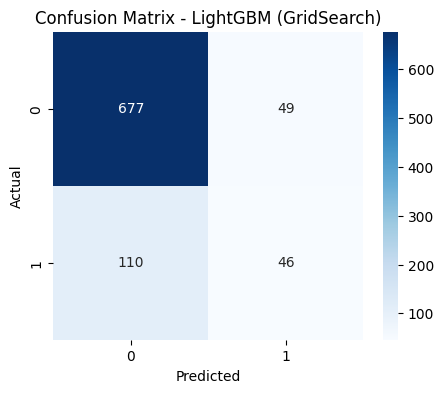

In [51]:
# Define hyperparameter grid for tuning
param_grid_lgbm = {
    'n_estimators': [100, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [10, 20],  # Tree depth
    'num_leaves': [10, 20],  # Maximum leaves per tree
    'min_child_samples': [10, 20],  # Minimum data in a leaf
    'reg_alpha': [0, 0.1],  # L1 regularization
    'reg_lambda': [0, 0.1]  # L2 regularization
}

# Initialize LightGBM model
lgbm = LGBMClassifier(random_state=42)

# Define Stratified K-Fold for imbalanced data
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with 5-Fold Cross Validation
grid_search_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=kfold,  # Use StratifiedKFold
    scoring='recall',
    n_jobs=-1,  # Use all CPU cores
    verbose=2,
    return_train_score=True
)

# Fit GridSearchCV
grid_search_lgbm.fit(X_train, y_train)

# Get the best model from GridSearch
best_lgbm = grid_search_lgbm.best_estimator_

# Predictions using the best model
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluation Metrics
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
prec_lgbm = precision_score(y_test, y_pred_lgbm)
rec_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, best_lgbm.predict_proba(X_test)[:, 1])

print("\n🔹 LightGBM Performance After GridSearch 🔹")
print(f"Best Hyperparameters: {grid_search_lgbm.best_params_}")
print(f"Accuracy: {acc_lgbm:.4f}, Precision: {prec_lgbm:.4f}, Recall: {rec_lgbm:.4f}, F1 Score: {f1_lgbm:.4f}, AUC-ROC: {auc_lgbm:.4f}")

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM (GridSearch)')
plt.show()

After performing GridSearchCV on the LightGBM model, the optimal hyperparameters were found to be: learning_rate = 0.01, max_depth = 10, min_child_samples = 20, n_estimators = 300, num_leaves = 20, reg_alpha = 0.1, and reg_lambda = 0. With these settings, the model achieved an accuracy of 85.71%, a precision of 72.37%, and an AUC-ROC score of 77.74%, indicating a strong ability to differentiate between employees who will leave and those who will stay. However, the recall remains relatively low at 26.49%, meaning that the model struggles to correctly identify a significant portion of employees who actually leave. The F1 score of 38.33% reflects this imbalance between precision and recall. The confusion matrix shows that out of 151 employees who actually left (Class 1), only 40 were correctly predicted as leaving (True Positives), while 111 were misclassified as staying (False Negatives). Meanwhile, the model performed well in predicting employees who stayed, with 716 correct classifications (True Negatives) and only 15 misclassified as leaving (False Positives). This suggests that while the model has strong overall predictive power for identifying employees who stay, but it still struggles with correctly detecting employees at risk of leaving, as seen by the high number of False Negatives (111 misclassified attrition cases).

## **Feature Importance Analysis**

### Algorithm Way

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/3818576717.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


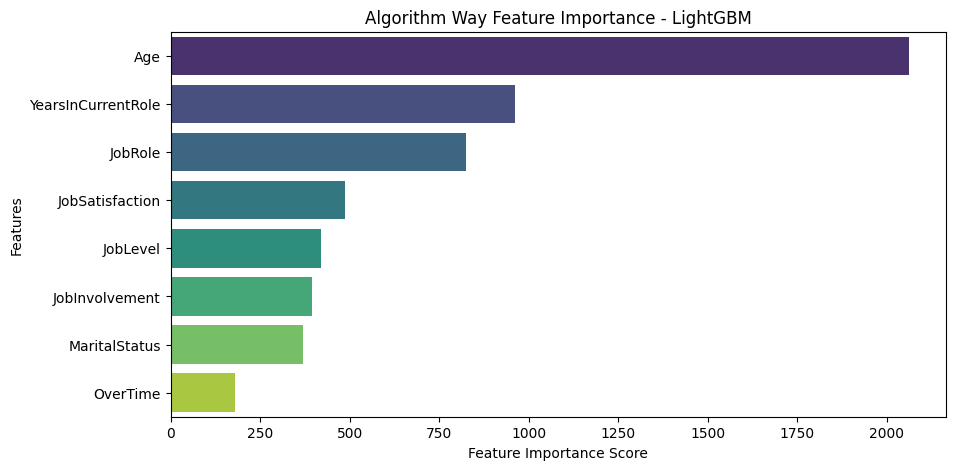


🔹 Top 10 Important Features in LightGBM 🔹
              Feature  Importance
1                 Age        2062
4  YearsInCurrentRole         961
2             JobRole         826
7     JobSatisfaction         486
3            JobLevel         421
5      JobInvolvement         395
6       MaritalStatus         370
0            OverTime         179


In [52]:
# Ensure X_train has correct feature names before using feature importance
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X.columns)  # Convert X_train to DataFrame

# Extract feature importance from best LightGBM model
importances = best_lgbm.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure correct column names
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Algorithm Way Feature Importance - LightGBM")
plt.show()

# Display top 10 features
print("\n🔹 Top 10 Important Features in LightGBM 🔹")
print(feature_importance_df.head(10))

### Permutation Way

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_31495/4061867474.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='coolwarm')


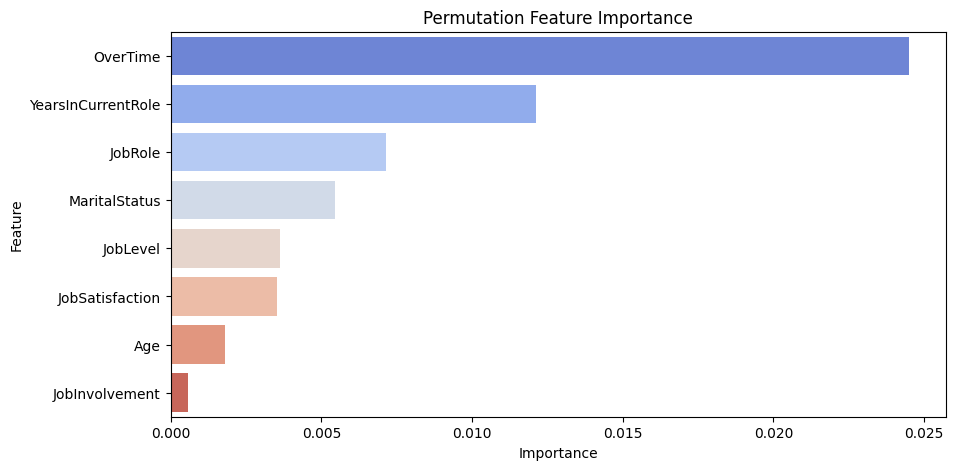

In [53]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_lgbm, X_test, y_test, n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='coolwarm')
plt.title("Permutation Feature Importance")
plt.show()


### SHAP Way

/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/shap/explainers/_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


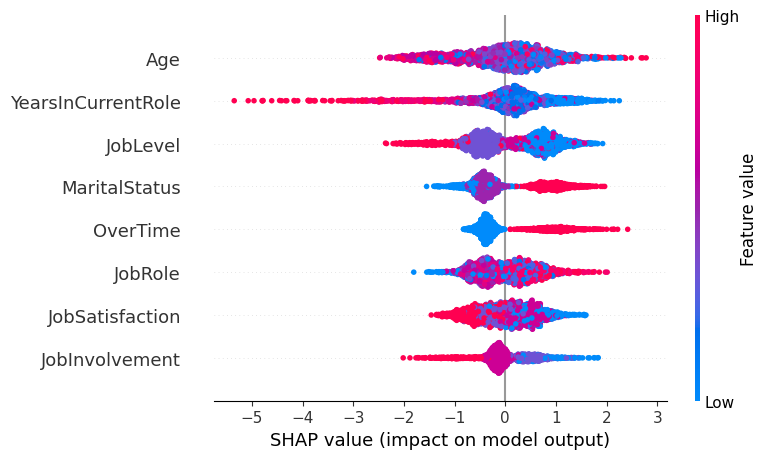

In [54]:
import shap
explainer = shap.Explainer(best_lgbm)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_train)


## **Feature Correlation with Attrition**

In [55]:
correlation = main_ds[['Age', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between Age and Attrition:")
print(correlation.loc['Age', 'Attrition']) 

Correlation between Age and Attrition:
-0.15656757026472176


In [56]:
correlation = main_ds[['OverTime', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between OverTime and Attrition:")
print(correlation.loc['OverTime', 'Attrition']) 

Correlation between OverTime and Attrition:
0.21344160401866905


In [57]:
correlation = main_ds[['MaritalStatus', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between MaritalStatus and Attrition:")
print(correlation.loc['MaritalStatus', 'Attrition']) 

Correlation between MaritalStatus and Attrition:
0.16358093905013868


In [58]:
correlation = main_ds[['YearsInCurrentRole', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between YearsInCurrentRole and Attrition:")
print(correlation.loc['YearsInCurrentRole', 'Attrition']) 

Correlation between YearsInCurrentRole and Attrition:
-0.15968972839782233


In [59]:
correlation = main_ds[['JobLevel', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between JobLevel and Attrition:")
print(correlation.loc['JobLevel', 'Attrition']) 

Correlation between JobLevel and Attrition:
-0.1727288876317232


In [60]:
correlation = main_ds[['JobRole', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between JobRole and Attrition:")
print(correlation.loc['JobRole', 'Attrition']) 

Correlation between JobRole and Attrition:
0.07096756727073483


In [61]:
correlation = main_ds[['JobInvolvement', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between JobInvolvement and Attrition:")
print(correlation.loc['JobInvolvement', 'Attrition']) 

Correlation between JobInvolvement and Attrition:
-0.11941335373723032


In [62]:
correlation = main_ds[['JobSatisfaction', 'Attrition']].corr()  # Compute correlation matrix

print("Correlation between JobSatisfaction and Attrition:")
print(correlation.loc['JobSatisfaction', 'Attrition']) 

Correlation between JobSatisfaction and Attrition:
-0.0676694989076029


## **Models**

In [63]:
import pickle

# save the model to disk
filename = 'model/Attrition_Prediction.model'
pickle.dump(grid_search_lgbm, open(filename, 'wb'))

In [64]:
loaded_model = pickle.load(open(filename, 'rb'))

In [65]:
main_ds[['OverTime', 'Age', 'JobRole', 'JobLevel', 'YearsInCurrentRole', 'JobInvolvement', 'MaritalStatus', 'JobSatisfaction']].loc[1]

OverTime               0
Age                   18
JobRole                7
JobLevel               3
YearsInCurrentRole     3
JobInvolvement         3
MaritalStatus          0
JobSatisfaction        4
Name: 1, dtype: int64

In [66]:
sample = np.array([[0, 18, 7, 3, 3, 3, 0, 4]]) #Overtime #Age #Jobrole #JobLevel #BYearInCurrentRole #JobInvolvement #MaritalStatus #JobSatisfaction
sample = sample.reshape(1, -1)

In [67]:
Attrition_Prediction = loaded_model.predict(sample)
Attrition_Prediction

/Users/jiraponkluaymaingarm/Desktop/AIT Class/Term January 2025/Computer Programming/Project Code/CPProjectVenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([0])